In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../LP-1 Dataset/Decision Tree & Naive Bayes Classification/madfhantr.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [8]:
imputer = SimpleImputer(strategy='mean')

for col in ('LoanAmount','Loan_Amount_Term','Credit_History'):
    df[col] = imputer.fit_transform(df[[col]])

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

for col in ('Gender', 'Married', 'Dependents', 'Self_Employed'):
    df[col] = imputer.fit_transform(df[[col]]).ravel()

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

for col in ('Gender', 'Married', 'Dependents', 'Self_Employed','Education'):
    df[col] = labels.fit_transform(df[[col]])


df.drop(['Loan_ID'], axis=1, errors='ignore')
x = df.iloc[:,:11]
x

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.p

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0


In [32]:
y = df['Loan_Status']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [34]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [35]:
trees = DecisionTreeClassifier()

In [37]:
x_train = x_train.iloc[:,1:]

In [38]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
93,1,0,0,0,0,4133,0.0,122.0,360.0,1.000000
395,1,1,2,0,0,3276,484.0,135.0,360.0,0.842199
139,1,1,2,1,0,4200,1430.0,129.0,360.0,1.000000
40,1,0,0,0,0,3600,0.0,80.0,360.0,1.000000
179,1,0,0,1,0,2333,1451.0,102.0,480.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
295,1,1,3,0,0,4416,1250.0,110.0,360.0,1.000000
249,1,1,0,0,0,1809,1868.0,90.0,360.0,1.000000
517,1,1,0,1,0,3074,1800.0,123.0,360.0,0.000000
268,0,0,0,0,0,3418,0.0,135.0,360.0,1.000000


In [39]:
trees.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
x_test = x_test.iloc[:,1:]

In [41]:
trees.predict(x_test)

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
      dtype=object)

In [42]:
accuracy_score(y_test, trees.predict(x_test))

0.6948051948051948

In [46]:
x_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.369814,0.177842,0.019224,0.015708,0.058874,0.068708,0.083310,-0.087051,-0.002875
Married,0.369814,1.000000,0.304748,-0.013521,0.004598,0.058157,0.055655,0.135221,-0.110768,-0.004655
Dependents,0.177842,0.304748,1.000000,0.046700,0.042448,0.127796,0.023436,0.197759,-0.071378,-0.052661
Education,0.019224,-0.013521,0.046700,1.000000,-0.026347,-0.139028,-0.067570,-0.162102,-0.058667,-0.084469
Self_Employed,0.015708,0.004598,0.042448,-0.026347,1.000000,0.107692,-0.015743,0.105463,-0.013599,0.038095
ApplicantIncome,0.058874,0.058157,0.127796,-0.139028,0.107692,1.000000,-0.119188,0.554906,-0.042606,-0.018823
CoapplicantIncome,0.068708,0.055655,0.023436,-0.067570,-0.015743,-0.119188,1.000000,0.167977,-0.062371,-0.008962
LoanAmount,0.083310,0.135221,0.197759,-0.162102,0.105463,0.554906,0.167977,1.000000,0.045508,-0.031041
Loan_Amount_Term,-0.087051,-0.110768,-0.071378,-0.058667,-0.013599,-0.042606,-0.062371,0.045508,1.000000,0.009498
Credit_History,-0.002875,-0.004655,-0.052661,-0.084469,0.038095,-0.018823,-0.008962,-0.031041,0.009498,1.000000


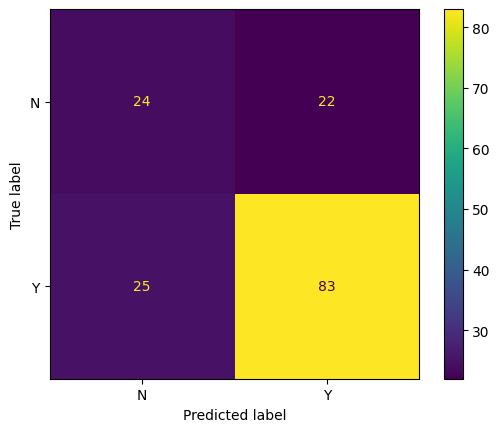

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, trees.predict(x_test))

In [48]:
confusion_matrix(y_test, trees.predict(x_test))

array([[24, 22],
       [25, 83]], dtype=int64)